In [14]:
import os
import numpy as np
from sklearn.svm import SVC
import cv2
from matplotlib import pyplot as plt

In [38]:
#=======================loading data =====================
def load_images(subject):
    root_dir = os.getcwd()
    image_dir = root_dir +'/'+subject
    os.chdir(image_dir)
    images = os.listdir()
    subject_images =  cv2.imread(images[0],0)
    data_image = np.array([subject_images])
    subject_data = subject_images.reshape(1, -1)[0]
    for index, image in enumerate(images):
        if index>0:
            image_data = cv2.imread(image, 0)
            img_array =image_data.reshape(1, -1)[0]
            subject_data = np.vstack((subject_data, img_array))
            data_image = np.append(data_image, [image_data], axis=0)
        continue
    os.chdir(root_dir)
    return [subject_data, data_image]

In [44]:
#os.chdir('/home/kalebu/Music/work/data_clean')
subject_1, subject1_image = load_images('subject_1')
subject_2, subject2_image = load_images('subject_2')

In [48]:
def plot_samples(subject_index=0):
    subject_name = np.copy(subject1_image)
    if subject_index ==1:
        subject_name = np.copy(subject2_image)
    plt.figure(figsize=(10, 10))
    for picture in range(5):
        plt.subplot(5,5,picture+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(subject_name[picture])
    plt.show()

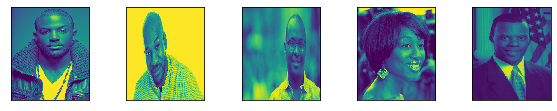

In [49]:
#============================Black Face Samples=====================
plot_samples()

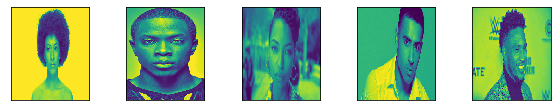

In [51]:
#==========================white face Samples ========================
plot_samples(subject_index = 1)

In [52]:
len(subject_1)

19

In [53]:
len(subject_2)

22

In [56]:
subject1_labels  = np.zeros(19)
subject2_labels = np.ones(22)

In [57]:
subject1_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [59]:
subject2_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [65]:
#==================Linking Everything Together==================
x_train = np.vstack((subject_1, subject_2))
y_train = np.append(subject1_labels, subject2_labels)

In [66]:
len(x_train)

41

In [67]:
len(y_train)

41

In [68]:
model = SVC()

In [69]:
model.fit(x_train, y_train)

/home/kalebu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
model.predict(x_train)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [71]:
from sklearn.externals import joblib
joblib.dump(model, 'Fashion.pkl')

/home/kalebu/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Fashion.pkl']